


# ASSIGNMENT- 4: EXPLORATORY DATA ANALYSIS (COVID 19 INDIA DATASET)
# Name - FARDEEN KHAN
# Registration id - SIRSS1158

In [22]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [23]:
# loading dataset

df=pd.read_csv('Covid-19 India Status.csv')

In [24]:
# top 10 entries of dataset

df.head(10)

,State/UTs,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
0,Andaman and Nicobar,7560,10,7421,129,0.13,98.16,1.71
1,Andhra Pradesh,2004590,13677,1977163,13750,0.68,98.63,0.69
2,Arunachal Pradesh,52409,1127,51023,259,2.15,97.36,0.49
3,Assam,585689,8005,572084,5600,1.37,97.68,0.96
4,Bihar,725605,102,715853,9650,0.01,98.66,1.33
5,Chandigarh,65069,35,64222,812,0.05,98.70,1.25
6,Chhattisgarh,1004230,653,990022,13555,0.07,98.59,1.35
7,Dadra and Nagar Haveli and Daman and Diu,10659,4,10651,4,0.04,99.92,0.04
8,Delhi,1437485,411,1411995,25079,0.03,98.23,1.74
9,Goa,173357,932,169239,3186,0.54,97.62,1.84


In [25]:
df.shape

(36, 8)

In [26]:
# checking for duplicates

df.duplicated().sum()

0

In [27]:
df.columns

Index(['State/UTs', 'Total Cases', 'Active', 'Discharged', 'Deaths',
       'Active Ratio (%)', 'Discharge Ratio (%)', 'Death Ratio (%)'],
      dtype='object')

In [28]:
# checking for null values

df.isnull().sum()

State/UTs              0
Total Cases            0
Active                 0
Discharged             0
Deaths                 0
Active Ratio (%)       0
Discharge Ratio (%)    0
Death Ratio (%)        0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


In [30]:
df.describe()

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
count,3.600000e+01,36.000000,3.600000e+01,36.000000,36.000000,36.000000,36.000000
mean,9.031213e+05,8953.527778,8.820634e+05,12104.388889,1.263611,97.471667,1.265278
std,1.316180e+06,27649.920018,1.276942e+06,23385.359462,2.313456,2.239131,0.563770
min,7.560000e+03,4.000000,7.421000e+03,4.000000,0.010000,87.300000,0.040000
25%,7.194125e+04,158.250000,6.865075e+04,806.750000,0.065000,97.357500,0.955000
50%,4.667220e+05,910.000000,4.572770e+05,5366.000000,0.570000,98.185000,1.295000
75%,1.002800e+06,6373.000000,9.880322e+05,13603.750000,1.065000,98.652500,1.607500
max,6.432649e+06,159870.000000,6.243034e+06,136355.000000,12.330000,99.920000,2.720000


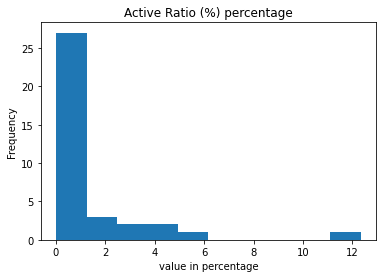

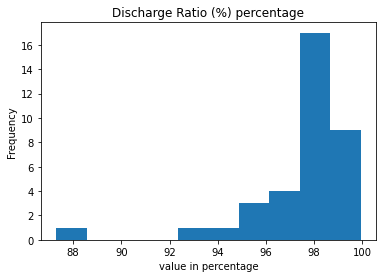

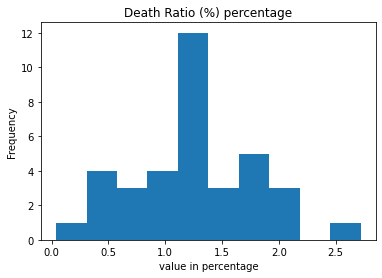

In [31]:
ratio = ['Active Ratio (%)','Discharge Ratio (%)','Death Ratio (%)']
    
for values in ratio:
    df[values].plot(kind='hist',bins =10)
    plt.title('{valname} percentage'.format(valname = values))
    plt.xlabel('value in percentage')
    plt.show()

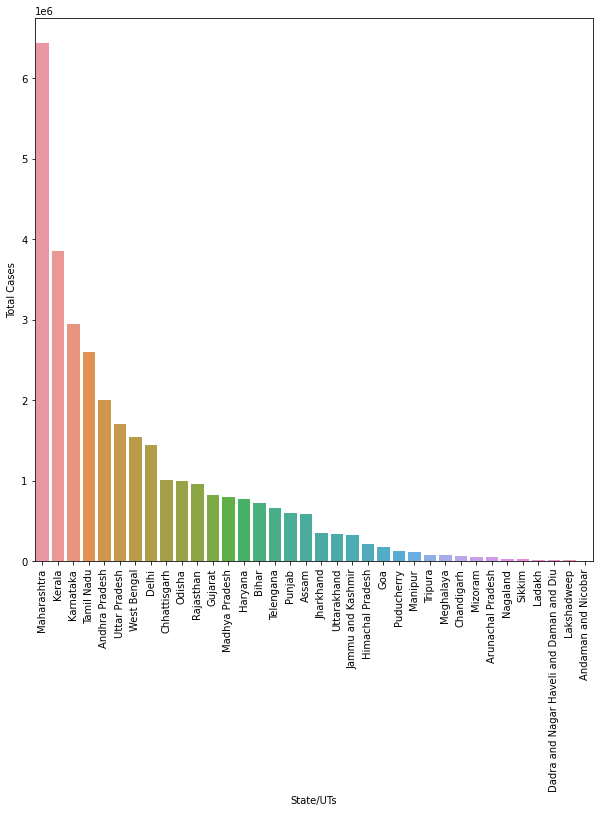

In [32]:
# Statewise Total cases

total_case_sort = df.sort_values(by='Total Cases',ascending = False)
plt.figure(figsize= (10,10))
sns.barplot(data = total_case_sort,x ='State/UTs',y='Total Cases')
plt.xticks(rotation = 90)
plt.show()

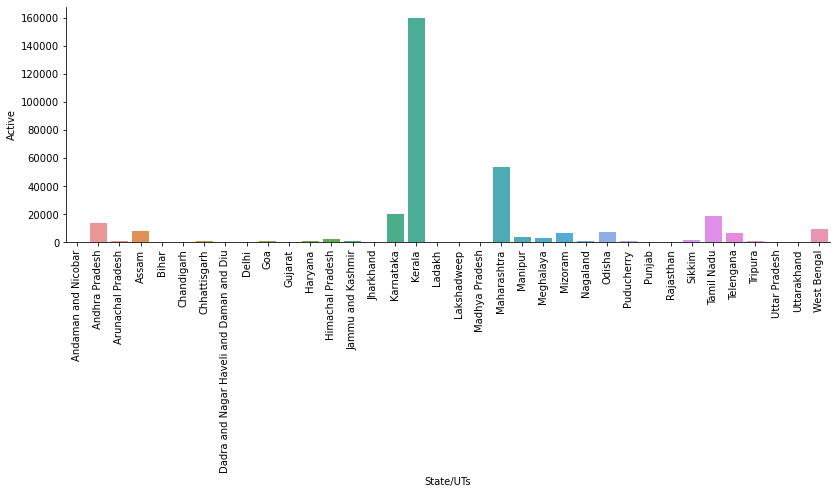

In [33]:
# Statewise Active Cases

sns.catplot(data = df,x ='State/UTs',y='Active',kind="bar",height = 4,aspect =3)
plt.xticks(rotation = 90)
plt.show()

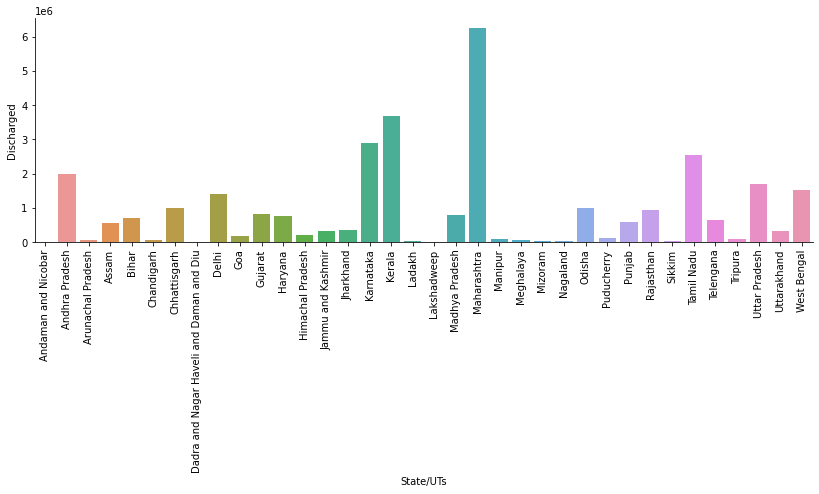

In [34]:
#Statewise Discharged cases

sns.catplot(data = df,x ='State/UTs',y='Discharged',kind="bar",height = 4,aspect =3)
plt.xticks(rotation = 90)
plt.show()

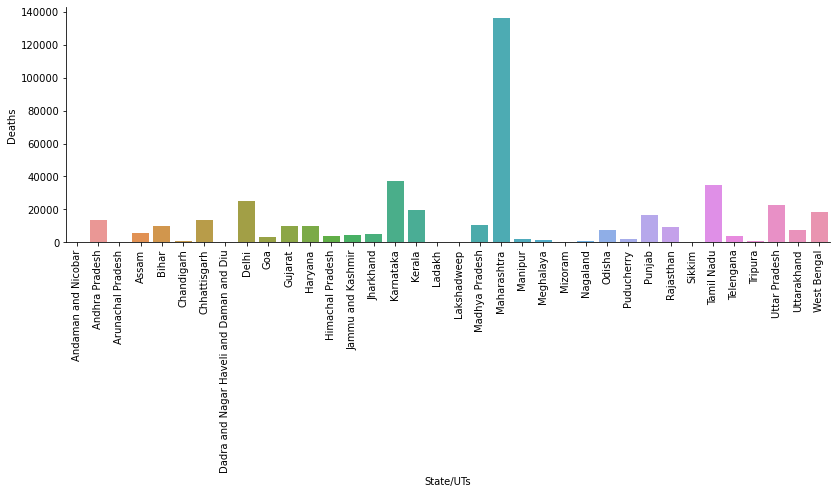

In [35]:
#Statewise Deaths

sns.catplot(data = df,x ='State/UTs',y='Deaths',kind="bar",height = 4,aspect =3)
plt.xticks(rotation = 90)
plt.show()

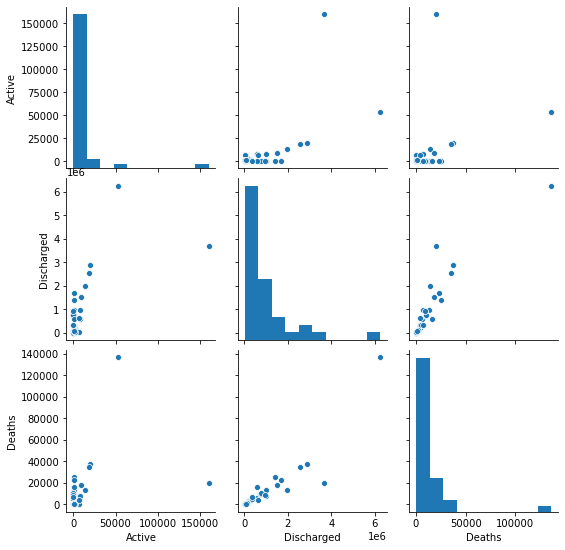

In [36]:
sns.pairplot(df[['Active','Discharged','Deaths']])

In [37]:
# Diffrentiating the states as high or low on the basis of total number of cases

status =[]

for vals in df['Active']:
    if vals>10000:
        status.append('high')
    else:
        status.append('low')

In [38]:
df['status_of_cases'] = status
figure = px.bar(df,x = 'State/UTs',y ='Total Cases',color='status_of_cases')
figure.show()

In [39]:
df.corr()

,Total Cases,Active,Discharged,Deaths,Active Ratio (%),Discharge Ratio (%),Death Ratio (%)
Total Cases,1.000000,0.657405,0.999924,0.904746,-0.083121,0.062078,0.092816
Active,0.657405,1.000000,0.649104,0.373963,0.217516,-0.181338,-0.173172
Discharged,0.999924,0.649104,1.000000,0.906137,-0.088095,0.066903,0.094055
Deaths,0.904746,0.373963,0.906137,1.000000,-0.125013,0.055103,0.292854
Active Ratio (%),-0.083121,0.217516,-0.088095,-0.125013,1.000000,-0.969908,-0.251648
Discharge Ratio (%),0.062078,-0.181338,0.066903,0.055103,-0.969908,1.000000,0.008449
Death Ratio (%),0.092816,-0.173172,0.094055,0.292854,-0.251648,0.008449,1.000000


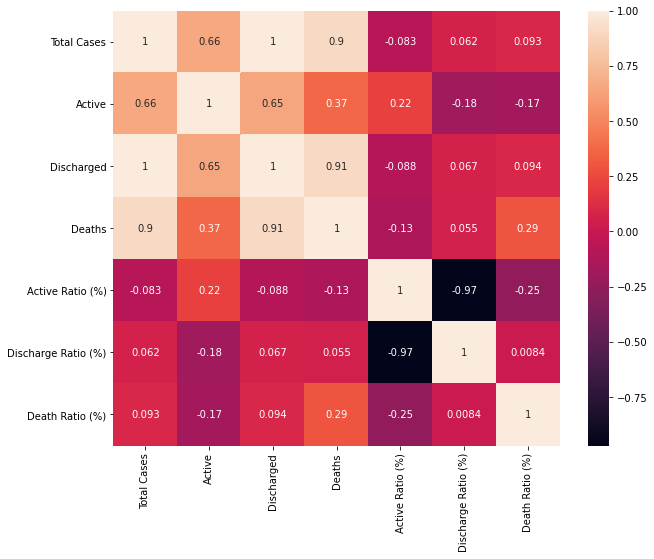

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True);

In [41]:
fig = px.scatter(df, x="Total Cases", y="Active", size="Deaths", color='State/UTs',size_max = 40)
fig.show()